In [1]:
import keras
import tensorflow as tf
keras.__version__

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

'2.3.1'

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
#Download data
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Ankle boot


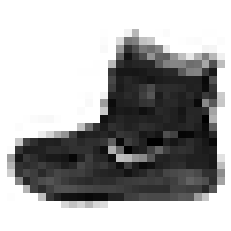

In [4]:
#Let's plot first element of train data to look with what we have to deal
print(class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
#Own y_train set is made of numbers from 0 to 9.
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

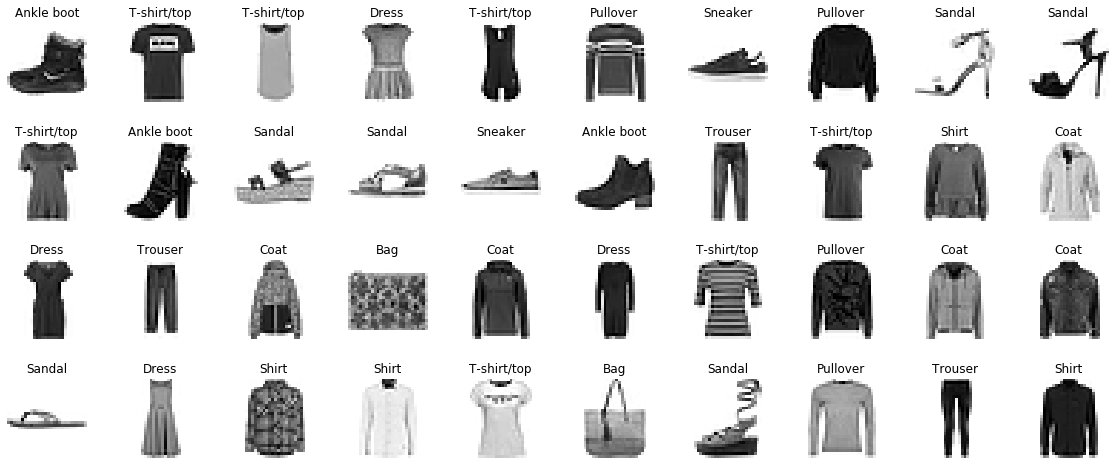

In [6]:
#Let's plot more examples of own data
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [7]:
from scipy.ndimage import shift
def dataCreator(X,y,y_axis=0,x_axis=0):
    newX = X.copy()
    newy = y.copy()
    for x in range(len(X)):
        newX[x] = shift(newX[x],[y_axis,x_axis])
    return newX,newy

In [8]:
X_left, y_left = dataCreator(X_train, y_train,x_axis=-1)
X_right, y_right = dataCreator(X_train, y_train,x_axis=1)
X_up, y_up = dataCreator(X_train, y_train,y_axis=-1)
X_down, y_down = dataCreator(X_train, y_train,y_axis=1)

In [9]:
import numpy as np
X_train = np.concatenate((X_train, X_left, X_right, X_up, X_down))
y_train = np.concatenate((y_train, y_left, y_right, y_up, y_down))

In [10]:
#So now we know what's data looks like. Now is time to build network.
#1
from keras import models
from keras import layers
from keras import regularizers
import numpy as np

In [11]:
network = models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dropout(rate=0.25))
network.add(layers.Dense(512,activation="relu"))
network.add(layers.Dropout(rate=0.28))
network.add(layers.Dense(256,activation="relu"))
network.add(layers.Dropout(rate=0.28))
network.add(layers.Dense(512,activation="relu"))
network.add(layers.Dropout(rate=0.28))
network.add(layers.Dense(10,activation="softmax"))

In [12]:
opt = keras.optimizers.Nadam(learning_rate=0.0008, beta_1=0.9, beta_2=0.999)
network.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])

In [13]:
print(X_train.shape)
print(X_test.shape)

(300000, 28, 28)
(10000, 28, 28)


In [14]:
#Data preparing. We have to change X data sets from matrix to vector. Also network will be working better if we change 
# numerical interval form <0,255> to <0,1>, becouse we have images in data let's simply divide all X values by 255.
print("Before:")
print(X_train.shape)
print(X_test.shape)
X_train = X_train.reshape((300000, 28 * 28))
X_train = X_train.astype('float32') / 255
x_test = X_test.copy()
X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype("float32") / 255
print("After:")
print(X_train.shape)
print(X_test.shape)

Before:
(300000, 28, 28)
(10000, 28, 28)
After:
(300000, 784)
(10000, 784)


In [15]:
#Y preparing. Network requires output's y values to be vectors. 
from keras.utils import to_categorical
Y_test = y_test.copy()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [16]:
#Traning of neural network
e = 10
history = network.fit(X_train, y_train, epochs=e, validation_split = 0.2, batch_size=100)


Train on 240000 samples, validate on 60000 samples
Epoch 1/10
240000/240000 [==============================] - 72s 300us/step - loss: 0.4901 - accuracy: 0.8212 - val_loss: 0.4671 - val_accuracy: 0.8196
Epoch 2/10
240000/240000 [==============================] - 70s 291us/step - loss: 0.3738 - accuracy: 0.8635 - val_loss: 0.4132 - val_accuracy: 0.8357
Epoch 3/10
240000/240000 [==============================] - 70s 291us/step - loss: 0.3436 - accuracy: 0.8742 - val_loss: 0.4186 - val_accuracy: 0.8376
Epoch 4/10
240000/240000 [==============================] - 70s 293us/step - loss: 0.3272 - accuracy: 0.8795 - val_loss: 0.3813 - val_accuracy: 0.8555
Epoch 5/10
240000/240000 [==============================] - 70s 290us/step - loss: 0.3161 - accuracy: 0.8838 - val_loss: 0.3868 - val_accuracy: 0.8546
Epoch 6/10
240000/240000 [==============================] - 71s 297us/step - loss: 0.3067 - accuracy: 0.8865 - val_loss: 0.3724 - val_accuracy: 0.8539
Epoch 7/10
240000/240000 [================

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [18]:
loss = history_dict["loss"]
accuracy = history_dict["accuracy"]
val_loss = history_dict["val_loss"]
val_accuracy = history_dict["val_accuracy"]
epochs = [x for x in range(1,e+1)]

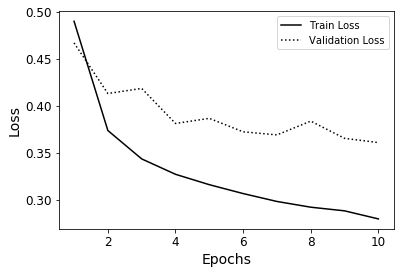

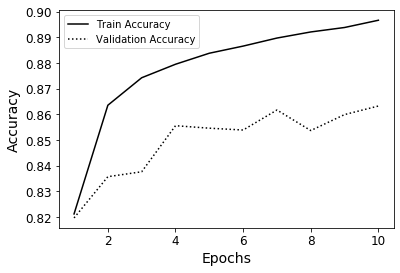

In [19]:
#Let's plot accuracy and loss function
fig, ax = plt.subplots()
ax.plot(epochs, loss, 'k', label='Train Loss')
ax.plot(epochs, val_loss, 'k:', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
legend = ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(epochs, accuracy, 'k', label='Train Accuracy')
ax.plot(epochs, val_accuracy, 'k:', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
legend = ax.legend()
plt.show()

In [20]:
#Testing network with test sets
test_loss, test_accuracy = network.evaluate(X_test, y_test)
print("Test accuracy: ",np.round(test_accuracy*100,decimals=2),"%")
print("Test loss: ",test_loss)

10000/10000 [==============================] - 1s 122us/step
Test accuracy:  89.34 %
Test loss:  0.2993919017970562


In [ ]:
#Test accuracy is relative close to train accuracy, so that means neural network is not overfit.

In [21]:
predictions = network.predict(X_test)
pr = network.predict_classes(X_test)

In [22]:
wrong = x_test[pr != Y_test]
wrong_Y = Y_test[pr != Y_test]
wrong_pr = pr[pr != Y_test]

Legend: wrong prediction|y true value


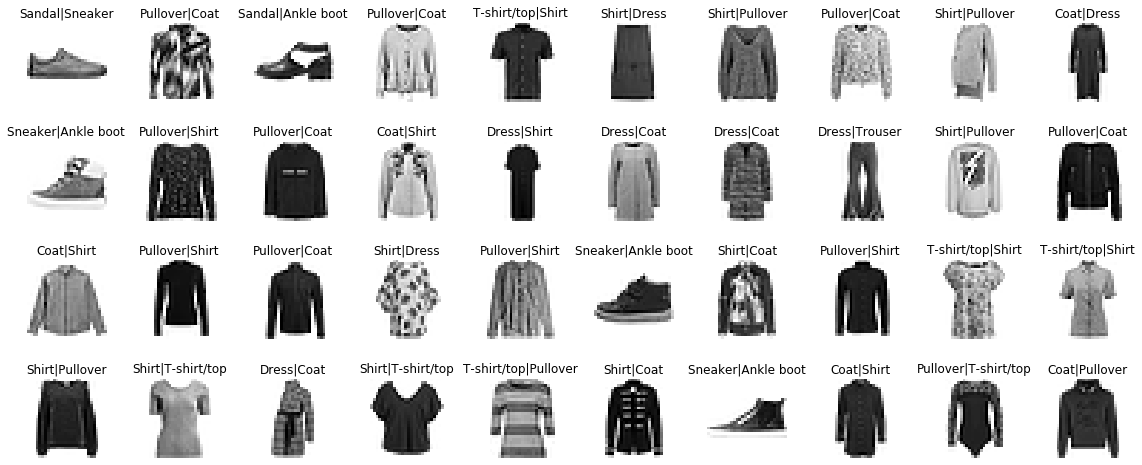

In [23]:
#Now let's look at wrong classified data
print("Legend: wrong prediction|y true value")
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(wrong[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[wrong_pr[index]]+"|"+class_names[wrong_Y[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
#As we can see this model is not perfect. To fix it we will create more examlpes of our data.
from scipy.ndimage import shift
def dataCreator(X,y,y_axis=0,x_axis=0):
    newX = X.copy()
    newy = y.copy()
    for x in range(len(X)):
        newX[x] = shift(newX[x],[y_axis,x_axis])
    return newX,newy
                

In [ ]:
X_left, y_left = dataCreator(X_train, y_train,x_axis=-1)
X_right, y_right = dataCreator(X_train, y_train,x_axis=1)
X_up, y_up = dataCreator(X_train, y_train,y_axis=-1)
X_down, y_down = dataCreator(X_train, y_train,y_axis=1)

In [1]:
def rozklad(x):
    i = 2
    wynik = []
    while i<=x:
        if x % i == 0:
            wynik.append(i)
            x /= i
            i = 2
        else:
            i += 1
    return wynik

In [8]:
x = rozklad(14)

In [9]:
print(x)

[2, 7]
